<a href="https://colab.research.google.com/github/abhay-2108/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('A:\Visual Files\Machine Learning Project\SMS Spam Detection\spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# Data cleaning
# EDA
# Text Preprocessing
# Model Building
#Evaluation
#Improvement
#Website
#Deployment

**Data** **Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# we drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2911,ham,You didn't have to tell me that...now i'm thin...
12,spam,URGENT! You have won a 1 week FREE membership ...
4150,ham,ÌÏ comin to fetch us oredi...
391,ham,Hey so this sat are we going for the intro pil...
3124,spam,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5153,ham,Haven't left yet so probably gonna be here til...
4537,ham,Dare i ask... Any luck with sorting out the car?
796,spam,"Orange customer, you may now claim your FREE C..."
2373,spam,XMAS Prize draws! We are trying to contact U. ...
3930,ham,Nooooooo I'm gonna be bored to death all day. ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicates
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# **EDA**   

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

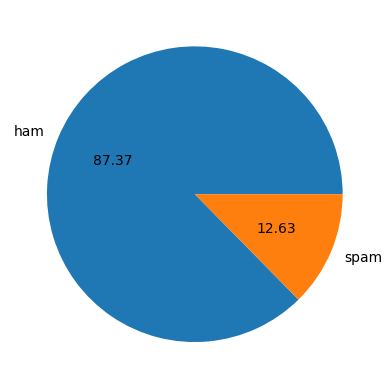

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
%pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab') # Download the 'punkt_tab' resource.
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Ham messages
df[df['target'] == 0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Spam messages
df[df['target'] == 1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns  #for data visulaizatin

<Axes: xlabel='num_characters', ylabel='Count'>

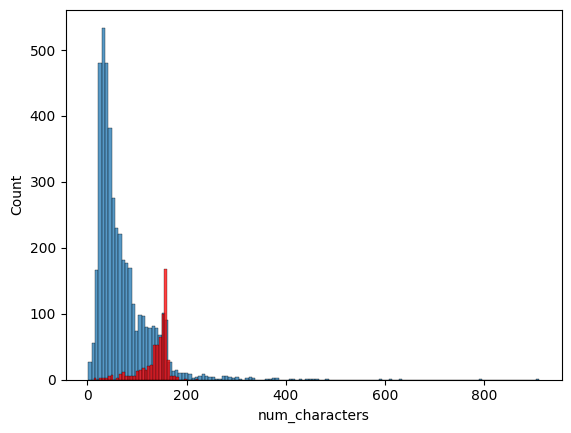

In [ ]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red') # number of characters is more in spam

<Axes: xlabel='num_words', ylabel='Count'>

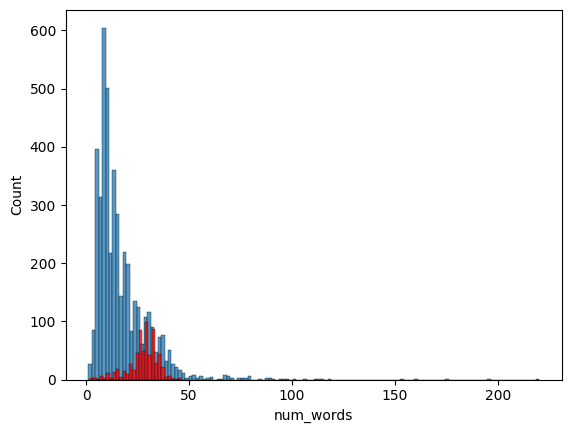

In [ ]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red') # number of words is more in spam

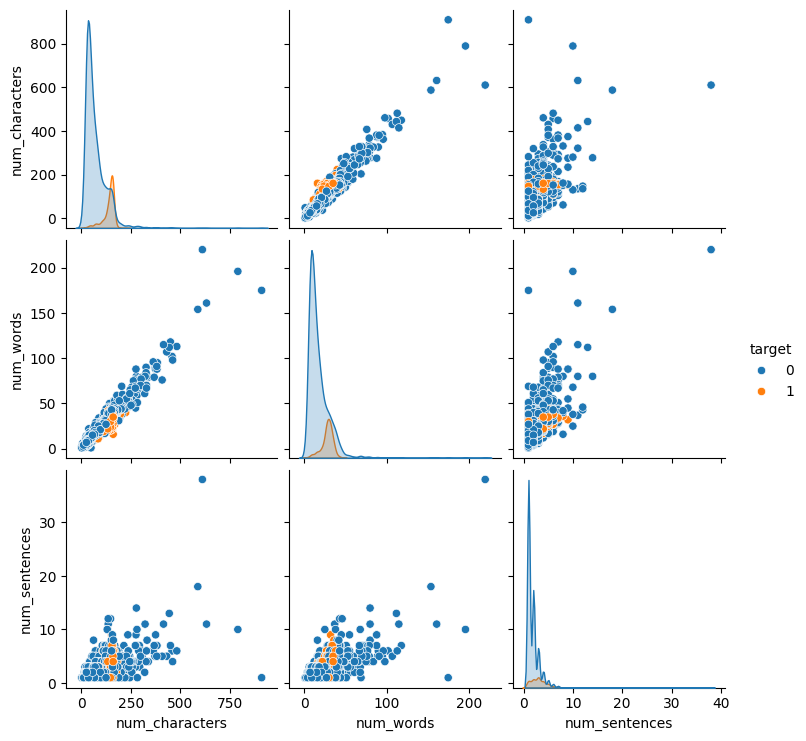

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

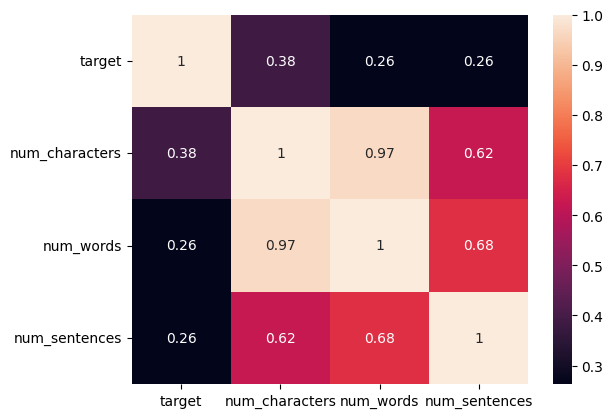

In [ ]:
# Convert the 'target' column to numeric type if it's not already.
df['target'] = pd.to_numeric(df['target'])

# Select only the numeric columns from the DataFrame.
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix using the numeric DataFrame.
sns.heatmap(numeric_df.corr(), annot=True)

**Data** **Preprocessing**

*   Lower Case
*   Tokenization

*   Removing special characters

*   Removing stop words and punctuation
*   Stemming





In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

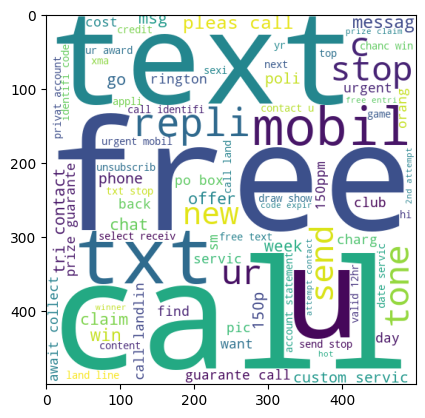

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

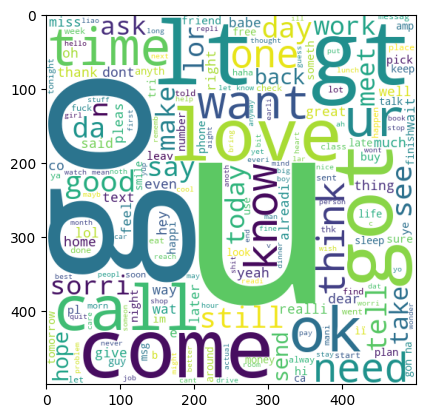

In [ ]:
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [ ]:
len(spam_corpus)

9939

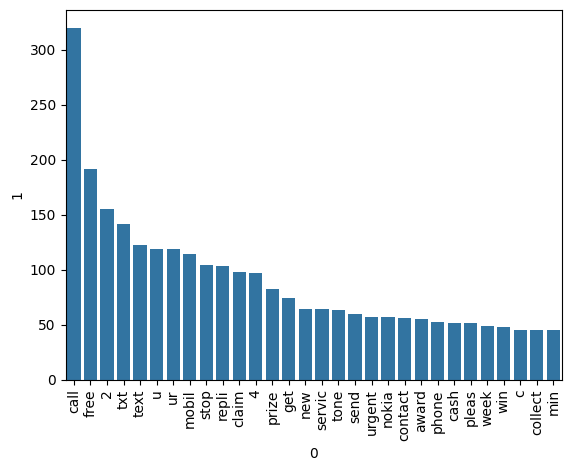

In [ ]:
from collections import Counter
df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30))

#Use named arguments x and y
sns.barplot(x=df_spam_corpus[0], y=df_spam_corpus[1])

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [ ]:
len(ham_corpus)

35404

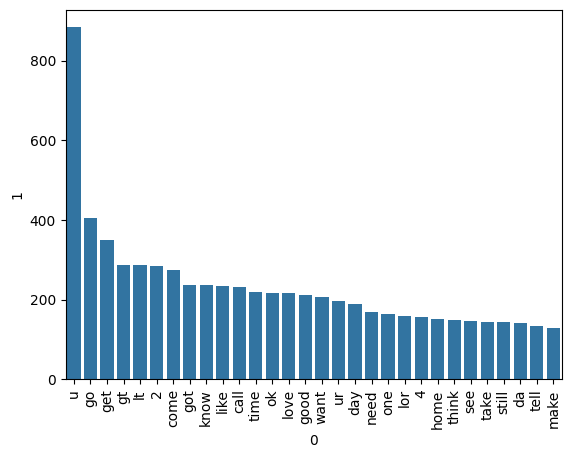

In [ ]:
from collections import Counter
df_ham_corpus = pd.DataFrame(Counter(ham_corpus).most_common(30))

#Use named arguments x and y
sns.barplot(x=df_ham_corpus[0], y=df_ham_corpus[1])

plt.xticks(rotation='vertical')
plt.show()

**Model** **Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
X = np.hstack((X,df['num_words'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3002)

In [ ]:
Y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [ ]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9506769825918762
[[896   0]
 [ 51  87]]
1.0


In [ ]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf --> MNB  is best as of now

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)
  return accuracy,precision

In [ ]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC accuracy is 0.8665377176015474
SVC precision is 0.0
KN accuracy is 0.9206963249516441
KN precision is 0.7413793103448276
DT accuracy is 0.941972920696325
DT precision is 0.8095238095238095
LR accuracy is 0.9497098646034816
LR precision is 0.8771929824561403
RF accuracy is 0.9729206963249516
RF precision is 0.9824561403508771


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy is 0.965183752417795
AdaBoost precision is 0.925
BgC accuracy is 0.9700193423597679
BgC precision is 0.9349593495934959
ETC accuracy is 0.9777562862669246
ETC precision is 0.9752066115702479
GBDT accuracy is 0.9497098646034816
GBDT precision is 0.9387755102040817
xgb accuracy is 0.9748549323017408
xgb precision is 0.9516129032258065


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.972921,0.982456
7,ETC,0.977756,0.975207
9,xgb,0.974855,0.951613
8,GBDT,0.949710,0.938776
6,BgC,0.970019,0.934959
5,AdaBoost,0.965184,0.925000
3,LR,0.949710,0.877193
2,DT,0.941973,0.809524
1,KN,0.920696,0.741379
0,SVC,0.866538,0.000000


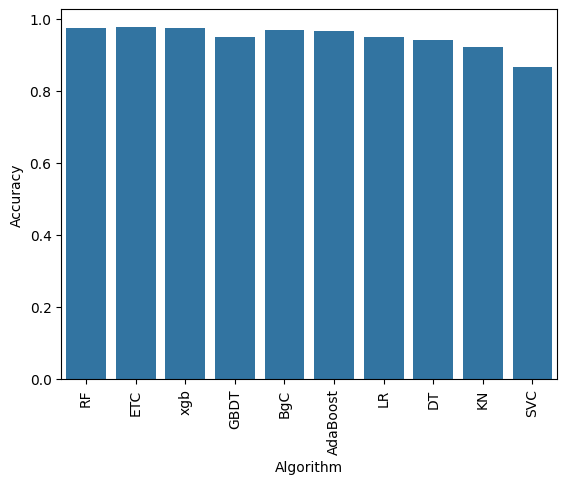

In [ ]:
sns.barplot(x='Algorithm',y='Accuracy',data=performance_df)
plt.xticks(rotation='vertical')
plt.show()

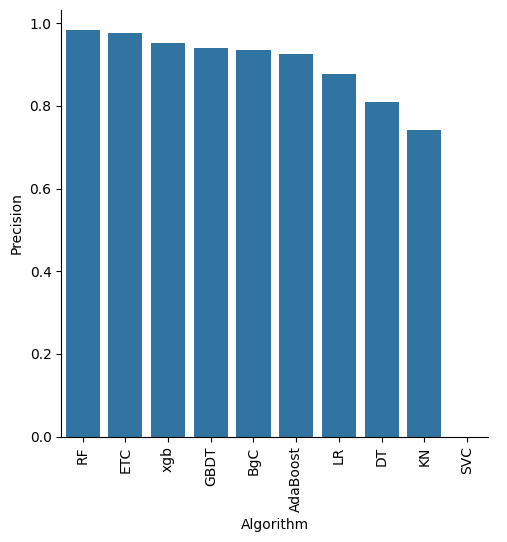

In [ ]:
sns.catplot(x='Algorithm',y='Precision',data=performance_df,kind='bar')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))  #wb - write binary
pickle.dump(mnb,open('model.pkl','wb'))